In [20]:
import numpy as np
import pandas as pd

# Создание датасета

Датасет был создан в файле perser.py, и предобработан в read_json.py

# Предобработка

In [58]:
data = np.load('songs.npy')
data = pd.DataFrame(data, columns=['Text', 'Artist'])
data

,Text,Artist
0,ive been dyin to tell you anything you want to...,Fall Out Boy
1,du du du du dudu du du some legends are told...,Fall Out Boy
2,i can work a miracle work a miracle ooh oh oh ...,Fall Out Boy
3,but we don’t have to be i’m bad behavior but i...,Fall Out Boy
4,la riots rodney king deepfakes earthquakes ice...,Fall Out Boy
...,...,...
155,drift by the window the autumn leaves of red a...,Frank Sinatra
156,and every time i see you grin im such a happy ...,Frank Sinatra
157,im a fool to want you to want a love that cant...,Frank Sinatra
158,oh those holiday jingle bells oh those happy j...,Frank Sinatra


In [59]:
X = data['Text']
y = data['Artist']

Разделим датасет на train и test выборки

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Создадим pipline (можно и без него, но хотелось попробовать):
1. Воспользуемся TF-IDF для того, чтобы преобразовать текст в вектор
2. Создадим модель KMeans

И обучим модель

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    TfidfVectorizer(),
    KMeans(n_clusters=7)
)

model.fit(X_train)
model.predict(X_test)

array([4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

Преобразуем имена исполнителей через LableEncoder => полчим y — истинные значения лейблов.

Через model[-1].labels_ найдем y_pred — предсказанные значения лейблов.

In [71]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import adjusted_rand_score

y = LabelEncoder().fit_transform(y_train)
y_pred = model[-1].labels_

print(y)
print(y_pred)

ari_score = adjusted_rand_score(y, y_pred)
ari_score

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 4 1 1 1 1 1 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1]


ValueError: Found input variables with inconsistent numbers of samples: [160, 128]

ValueError: x and y must be the same size

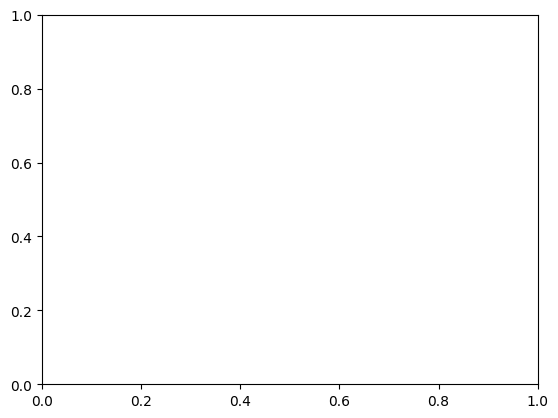

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Преобразование TF-IDF матрицы с помощью метода PCA
# pca = PCA(n_components=2)
# tfidf_matrix_2d = pca.fit_transform(X_test)

# Визуализация кластеров
plt.scatter(X_test[:, 0], y_pred, c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Кластеризация текстовых данных')
plt.colorbar(label='Cluster')
plt.show()
